In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import random

In [21]:
bias=100
X,y,coef=make_regression(n_features=1,noise=10,bias=bias,random_state=42,coef=True)

In [22]:
X.shape,y.shape

((100, 1), (100,))

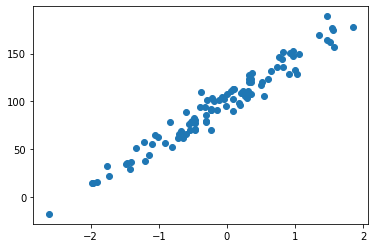

In [23]:
plt.scatter(X,y)

In [24]:
coef,bias

(array(41.74110031), 100)

In [25]:
y_gen=X*coef+bias

In [32]:
class LinearRegCustom:
    #constructor
    def __init__(self,lr=0.1):
        self.lr=lr
    
    def fit(self,X,y):
        self._X=X
        self._y=y.reshape(-1,1)
        self.coef_ = np.random.random()
        self.intercept_=np.random.random()
        #gradient descent
        errors=[]
        
        for i in range(50):
            self.gradient_descent()
            errors.append(self.error())
        return errors
    
    def gradient_descent(self):
        d_coef,d_intercept=self.gradient()
        self.coef_-=d_coef*self.lr
        self.intercept_-=d_intercept*self.lr
        
    def gradient(self):
        yh=self.predict(self._X)
        d_coef=((yh-self._y) * self._X).mean()
        d_intercept=(yh-self._y).mean()
        return d_coef,d_intercept
    
    def predict(self,X):
        return X*self.coef_+self.intercept_ 
    
    def error(self):
        return ((self._y-self.predict(self._X))**2).sum()
    
        

model=LinearRegCustom(lr=0.1)

In [33]:
model=LinearRegCustom(lr=0.1)

In [35]:
errors=model.fit(X,y)

In [36]:
model.coef_,model.intercept_

(43.25843389734432, 100.29934112406534)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model1=LinearRegression()

In [43]:
model1.fit(X,y)

LinearRegression()

In [44]:
model1.coef_,model1.intercept_

(array([44.43716999]), 101.16511532052698)

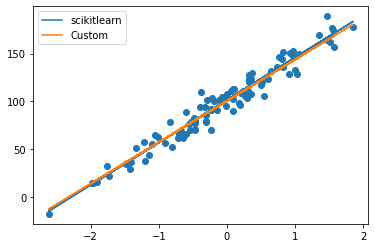

In [45]:
plt.scatter(X,y)
plt.plot(X,model1.predict(X),label='scikitlearn')
plt.plot(X,model.predict(X),label='Custom')
plt.legend()